In [91]:
import numpy as np
import matplotlib.pyplot as plt 
import sympy as sym

In [92]:
def sgn(x):
    if x<0:
        return -1
    if x>0:
        return 1
    else:
        return 0

In [93]:
func=np.vectorize(sgn)

In [94]:
x0=np.linspace(-1,0,50)
x=np.linspace(0,1,50)

X=np.append(x0,x)

In [95]:
Y=func(X)

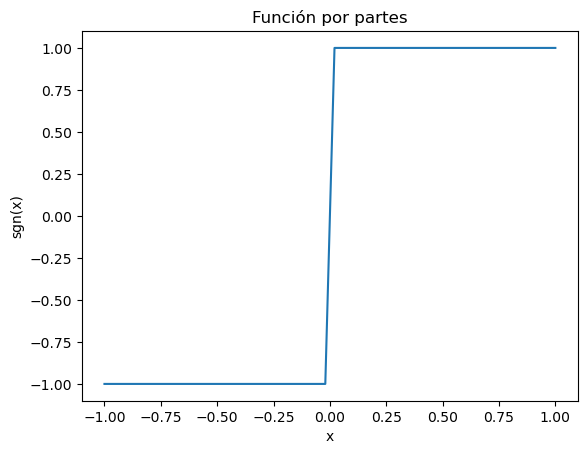

In [96]:
plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('sgn(x)')
plt.title('Función por partes')
plt.show()

In [97]:
n = 15
Roots1, Weights1 = np.polynomial.legendre.leggauss(n)

In [98]:
x=sym.Symbol("x",real=True)
y=sym.Symbol("y",real=True)

def GetLegendre(n,x,y):
    
    y=((x**2)-1)**n
    
    poly=sym.diff(y,x,n)/(2**n*np.math.factorial(n))
    
    return poly

Legendre=[]
N=20

for i in range(N+1):
    Poly=GetLegendre(i,x,y)
    Legendre.append(sym.lambdify([x],Poly,"numpy"))

In [99]:
def CoeficientesLegendre(f,p,N):
    coef = np.zeros(N+1)
    
    for n in range (N+1):
        
        I=np.sum(Weights1*f(Roots1)*p[n](Roots1))
        
        cn=0.5*(2*n+1)*I
        
        coef[n]=cn
        
    return coef

C=CoeficientesLegendre(func,Legendre,N)

In [86]:
#coef = CoeficientesLegendre(sgn, N)

#y=np.zeros_like(x)

#for i in range(len(x)):
 #   y[i] = np.polynomial.legendre.legval(x[i], coef * polinomios_legendre)

In [100]:
def Combinacion(x,p,N):
    
    Sum=0
    
    for k in range (N+1):
        
        Sum+=C[k]*p[k](x)
        
    return Sum

Aprox=Combinacion(X,Legendre,N)

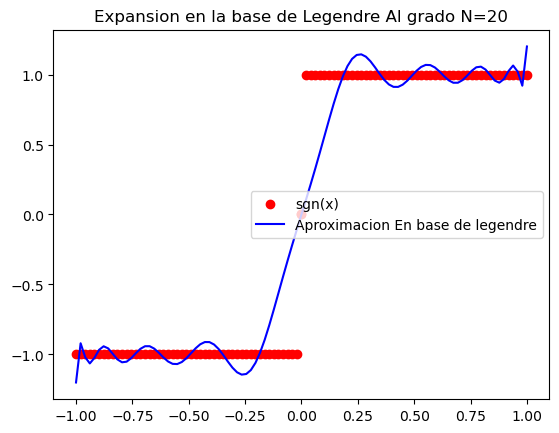

In [101]:
plt.title("Expansion en la base de Legendre Al grado N=20")
plt.scatter(X,Y,c="r",label="sgn(x)")
plt.plot(X,Aprox,c="b",label="Aproximacion En base de legendre")

plt.legend()